In [10]:
!pip install requests
import requests
import pandas as pd
from datetime import datetime, timedelta



In [32]:
# Replace 'your_api_token_here' with your actual Tiingo API token
api_token = '*********'
ticker = 'AAPL'

# Calculate the start date (5 years ago from today)
end_date = datetime.now()
start_date = end_date - timedelta(days=3.4*365)

# Format dates as strings
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# URL for historical prices
url = f'https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={start_date_str}&endDate={end_date_str}'

headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_token}'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print(f"Fetched {len(data)} days of data for AAPL.")
else:
    print("Failed to fetch data. Status code:", response.status_code)


Fetched 854 days of data for AAPL.


In [33]:
import pandas as pd
# Convert JSON data to pandas DataFrame
df = pd.DataFrame(data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         854 non-null    object 
 1   close        854 non-null    float64
 2   high         854 non-null    float64
 3   low          854 non-null    float64
 4   open         854 non-null    float64
 5   volume       854 non-null    int64  
 6   adjClose     854 non-null    float64
 7   adjHigh      854 non-null    float64
 8   adjLow       854 non-null    float64
 9   adjOpen      854 non-null    float64
 10  adjVolume    854 non-null    int64  
 11  divCash      854 non-null    float64
 12  splitFactor  854 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 86.9+ KB


In [22]:
print(df.head(10))

                       date   close    high     low    open    volume  \
0  2019-06-25T00:00:00.000Z  195.57  199.26  195.29  198.43  21070334   
1  2019-06-26T00:00:00.000Z  199.80  200.99  197.35  197.77  26067512   
2  2019-06-27T00:00:00.000Z  199.74  201.57  199.57  200.29  20899717   
3  2019-06-28T00:00:00.000Z  197.92  199.50  197.05  198.68  31110642   
4  2019-07-01T00:00:00.000Z  201.55  204.49  200.65  203.17  27316739   
5  2019-07-02T00:00:00.000Z  202.73  203.13  201.36  201.41  16935217   
6  2019-07-03T00:00:00.000Z  204.41  204.44  202.69  203.28  11362045   
7  2019-07-05T00:00:00.000Z  204.23  205.08  202.90  203.35  17265518   
8  2019-07-08T00:00:00.000Z  200.02  201.40  198.41  200.81  25338628   
9  2019-07-09T00:00:00.000Z  201.24  201.51  198.81  199.20  20578015   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  47.186641  48.076955  47.119084  47.876695   84281336      0.0          1.0  
1  48.207245  48.494365  47.616115

In [23]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,2024-06-14T00:00:00.000Z,212.49,215.17,211.30,213.85,70122748,212.49,215.17,211.30,213.85,70122748,0.0,1.0
1253,2024-06-17T00:00:00.000Z,216.67,218.95,212.72,213.37,93728300,216.67,218.95,212.72,213.37,93728300,0.0,1.0
1254,2024-06-18T00:00:00.000Z,214.29,218.63,213.00,217.59,79943254,214.29,218.63,213.00,217.59,79943254,0.0,1.0
1255,2024-06-20T00:00:00.000Z,209.68,214.24,208.85,213.93,86172451,209.68,214.24,208.85,213.93,86172451,0.0,1.0
1256,2024-06-21T00:00:00.000Z,207.49,211.89,207.11,210.39,246421353,207.49,211.89,207.11,210.39,246421353,0.0,1.0


In [42]:
df1=df.reset_index()['close']
df1.head()

0    131.96
1    134.14
2    134.99
3    133.94
4    137.39
Name: close, dtype: float64

In [43]:
df1.shape

(854,)

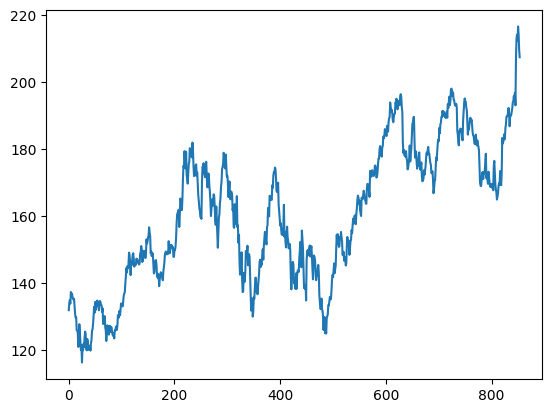

In [36]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [46]:
import numpy as np

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [48]:
df1.shape

(854, 1)

In [49]:
df1

array([[0.15551789],
       [0.17725052],
       [0.18572425],
       [0.1752567 ],
       [0.20965008],
       [0.20336955],
       [0.20486492],
       [0.19589273],
       [0.18971189],
       [0.18711993],
       [0.18951251],
       [0.16777988],
       [0.14435251],
       [0.13308743],
       [0.13468248],
       [0.09610208],
       [0.09470641],
       [0.08962217],
       [0.04615691],
       [0.04884857],
       [0.11394677],
       [0.08732928],
       [0.05682385],
       [0.03758349],
       [0.05044362],
       [0.        ],
       [0.04710398],
       [0.03608813],
       [0.05582694],
       [0.04655568],
       [0.0760642 ],
       [0.09181537],
       [0.0837404 ],
       [0.04157113],
       [0.03618782],
       [0.07008274],
       [0.06160901],
       [0.03718473],
       [0.04216928],
       [0.04835011],
       [0.05014455],
       [0.0352906 ],
       [0.05772106],
       [0.0661948 ],
       [0.09510517],
       [0.09819559],
       [0.11504337],
       [0.139

In [52]:
test_size=131
train_size=len(df1)-test_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [53]:
def create_dataseet(dataset,time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [54]:
timestep=100
x_train,y_train=create_dataseet(train_data,timestep)
x_test,y_test=create_dataseet(test_data,timestep)

In [55]:
print(x_test)

[[0.81347822 0.81497358 0.80959027 ... 0.6681288  0.65148041 0.65835909]
 [0.81497358 0.80959027 0.79284219 ... 0.65148041 0.65835909 0.66174858]
 [0.80959027 0.79284219 0.80330974 ... 0.65835909 0.66174858 0.67999202]
 ...
 [0.77898515 0.77569534 0.75824943 ... 0.96411126 0.9757751  0.95832918]
 [0.77569534 0.75824943 0.75137075 ... 0.9757751  0.95832918 1.        ]
 [0.75824943 0.75137075 0.71458479 ... 0.95832918 1.         0.97627355]]


In [56]:
print(x_test.shape),print(y_test.shape)

(30, 100)
(30,)


(None, None)

In [58]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [60]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=70,batch_size=64,verbose=1)

Epoch 1/70
10/10 [==============================] - 10s 334ms/step - loss: 0.0627 - val_loss: 0.0337
Epoch 2/70
10/10 [==============================] - 2s 176ms/step - loss: 0.0143 - val_loss: 0.0482
Epoch 3/70
10/10 [==============================] - 2s 171ms/step - loss: 0.0088 - val_loss: 0.0326
Epoch 4/70
10/10 [==============================] - 2s 170ms/step - loss: 0.0073 - val_loss: 0.0268
Epoch 5/70
10/10 [==============================] - 3s 281ms/step - loss: 0.0062 - val_loss: 0.0293
Epoch 6/70
10/10 [==============================] - 2s 195ms/step - loss: 0.0057 - val_loss: 0.0153
Epoch 7/70
10/10 [==============================] - 2s 168ms/step - loss: 0.0052 - val_loss: 0.0150
Epoch 8/70
10/10 [==============================] - 2s 172ms/step - loss: 0.0048 - val_loss: 0.0148
Epoch 9/70
10/10 [==============================] - 2s 171ms/step - loss: 0.0046 - val_loss: 0.0140
Epoch 10/70
10/10 [==============================] - 2s 173ms/step - loss: 0.0045 - val_loss: 0.012

In [80]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

1/1 [==============================] - 0s 67ms/step


In [82]:
print(train_predict[76],test_predict)

[0.2809172] [[0.6849546 ]
 [0.700113  ]
 [0.7078524 ]
 [0.70559907]
 [0.70880455]
 [0.71908957]
 [0.73736477]
 [0.7547344 ]
 [0.765885  ]
 [0.77428794]
 [0.7837962 ]
 [0.7868342 ]
 [0.77238137]
 [0.76409626]
 [0.76424575]
 [0.7699827 ]
 [0.77994764]
 [0.79204196]
 [0.8070492 ]
 [0.8195816 ]
 [0.8311879 ]
 [0.83372444]
 [0.8382986 ]
 [0.8303948 ]
 [0.8652919 ]
 [0.93264854]
 [0.9936267 ]
 [1.0203036 ]
 [1.034179  ]
 [1.0309924 ]]


In [84]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [85]:
print(test_predict[5],train_predict[5])

[188.49187] [138.01796]


In [86]:
import math
from sklearn.metrics import mean_squared_error as mse
math.sqrt(mse(y_train,train_predict))


163.77209919768555

In [87]:

math.sqrt(mse(y_test,test_predict))


197.09241484647967

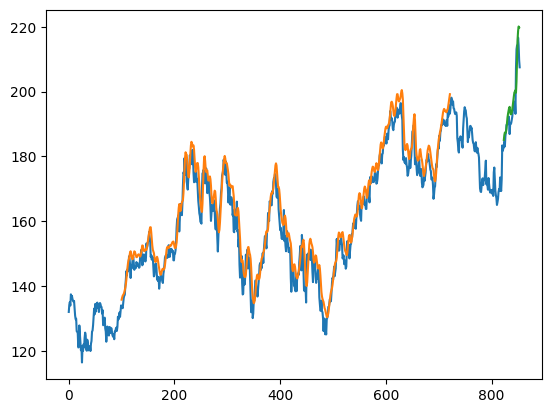

In [88]:
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testpredictplot=np.empty_like(df1)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [92]:
y_test=scaler.inverse_transform(y_test.reshape(-1,1))


In [93]:
for i in range(len(y_test)):
  print(f"day{i+1}: actual: {y_test[i]} and predicted: {test_predict[i]}")

day1: actual: [182.74] and predicted: [185.0678]
day2: actual: [184.57] and predicted: [186.58833]
day3: actual: [183.05] and predicted: [187.36467]
day4: actual: [186.28] and predicted: [187.13864]
day5: actual: [187.43] and predicted: [187.46017]
day6: actual: [189.72] and predicted: [188.49187]
day7: actual: [189.84] and predicted: [190.32506]
day8: actual: [189.87] and predicted: [192.06741]
day9: actual: [191.04] and predicted: [193.18593]
day10: actual: [192.35] and predicted: [194.02882]
day11: actual: [190.9] and predicted: [194.9826]
day12: actual: [186.88] and predicted: [195.28734]
day13: actual: [189.98] and predicted: [193.83757]
day14: actual: [189.99] and predicted: [193.0065]
day15: actual: [190.29] and predicted: [193.0215]
day16: actual: [191.29] and predicted: [193.59697]
day17: actual: [192.25] and predicted: [194.59656]
day18: actual: [194.03] and predicted: [195.80972]
day19: actual: [194.35] and predicted: [197.31511]
day20: actual: [195.87] and predicted: [198.5